In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
from v1dd_public import ARTIFACT_DIR
from allen_v1dd.client import OPhysClient

In [15]:
## plotting parameters
from matplotlib import rcParams
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "Arial"

fontsize=20

In [16]:
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
H5_DIR = os.path.join(ARTIFACT_DIR, 'stimulus_analyses_v2.h5')
DATA_DIR = Path("/home/naomi/Desktop/data/V1dd_nwbs")
client =  OPhysClient(DATA_DIR)

In [17]:
csv_tag = "_240610"

def load_and_preprocess(file_name, mouse_id):
    # remove duplicate neurons
    df = pd.read_csv(ARTIFACT_DIR / file_name, dtype={'column': str, 'volume': str, '2p3p': str, 'valid_not_duplicate': bool}, low_memory=False)
    df.insert(1, 'mouse_id', mouse_id, True)
    
    # remove all cells in the column 1 that are 2P (keeps the 3P)
    df = df[~((df["column"] == '1') & (df["2p3p"] == '2'))]
    df = df[df["valid_not_duplicate"]]
    return df

# Load and preprocess the data
slc2 = load_and_preprocess(f'slc2_all_stim_metrics{csv_tag}.csv', "slc2")
slc4 = load_and_preprocess(f'slc4_all_stim_metrics{csv_tag}.csv', "slc4")
slc5 = load_and_preprocess(f'slc5_all_stim_metrics{csv_tag}.csv', "slc5")
teto1 = load_and_preprocess(f'teto1_all_stim_metrics{csv_tag}.csv', "teto1")
cell_info = pd.concat([slc2, slc4, slc5, teto1], ignore_index=True)

In [18]:
res2 = ['mouse_id',
        'frac_resp_dgf',
        'frac_resp_dgw',
        'frac_res_to_ns118', # please note the other fraction frac_resp_ns118 is from Chase h5 which is incorrect
        'frac_res_to_ns12', # please note the other fraction frac_resp_ns12 is from Chase h5 which is incorrect
        'frac_resp_nm',
        'z',
        'column'
       ]
features_resp = cell_info[cell_info['is_responsive'] == True][res2]  # features_resp is a dataframe with the 7 response reliability fractions (columns) for every cell (rows) across all mice

features_resp = features_resp.rename(columns = {
       'frac_resp_dgf':'DGF',
       'frac_resp_dgw':'DGW',
       'frac_res_to_ns118':'NI118',
       'frac_res_to_ns12':'NI12',
       'frac_resp_nm':'NM',
       'z': 'depth'},)

## SUPPLEMENTARY FIGURE 9A

In [19]:
### Run stats on these depth distributions

# -----------------------------
# Helper to convert p → stars
# -----------------------------
def p_to_stars(p):
    alpha_levels = [0.05, 0.01, 0.001, 0.0001]  # thresholds for *, **, ***, ****
    if np.isnan(p):
        return ""
    if p < alpha_levels[3]:
        return "****"
    elif p < alpha_levels[2]:
        return "***"
    elif p < alpha_levels[1]:
        return "**"
    elif p < alpha_levels[0]:
        return "*"
    return ""



=== Analyzing stim type: DGF ===
Depth effect (likelihood ratio test): χ²(29) = -96.46, p = 1


/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Best depth = 466, mean accuracy = 0.391


=== Analyzing stim type: DGW ===


/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Depth effect (likelihood ratio test): χ²(29) = -57.43, p = 1
Best depth = 370, mean accuracy = 0.398


=== Analyzing stim type: NI118 ===
Depth effect (likelihood ratio test): χ²(29) = -67.62, p = 1
Best depth = 50, mean accuracy = 0.460


/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)




=== Analyzing stim type: NI12 ===
Depth effect (likelihood ratio test): χ²(29) = -116.19, p = 1
Best depth = 434, mean accuracy = 0.218


/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)




=== Analyzing stim type: NM ===
Depth effect (likelihood ratio test): χ²(29) = -109.48, p = 1


/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/naomi/anaconda3/envs/v1dd-public-2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Best depth = 466, mean accuracy = 0.521


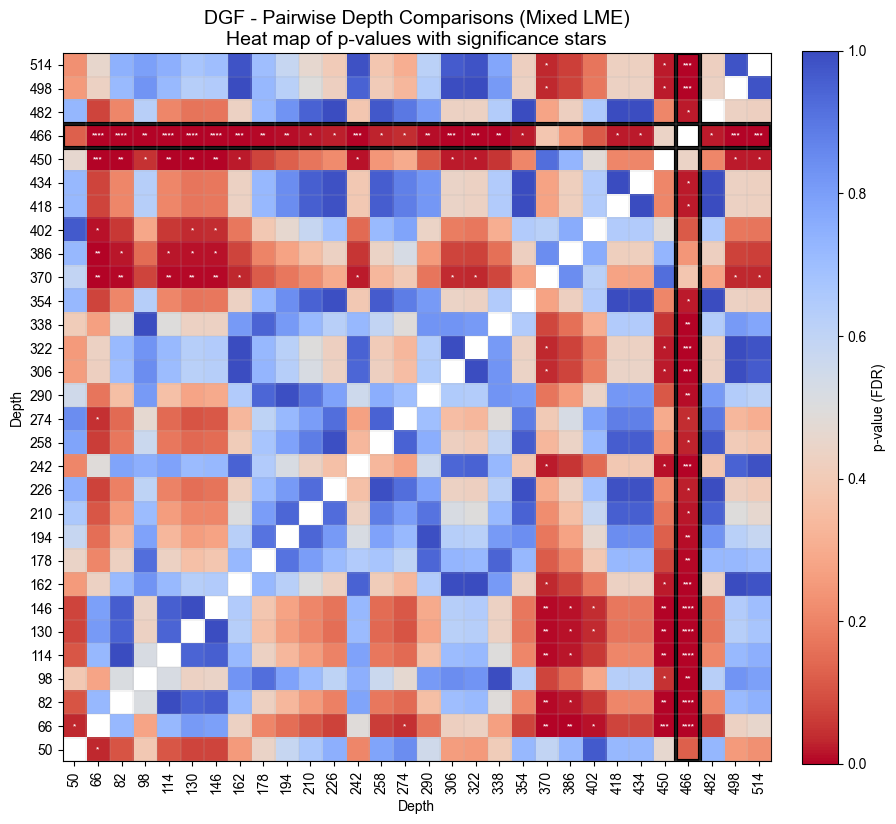

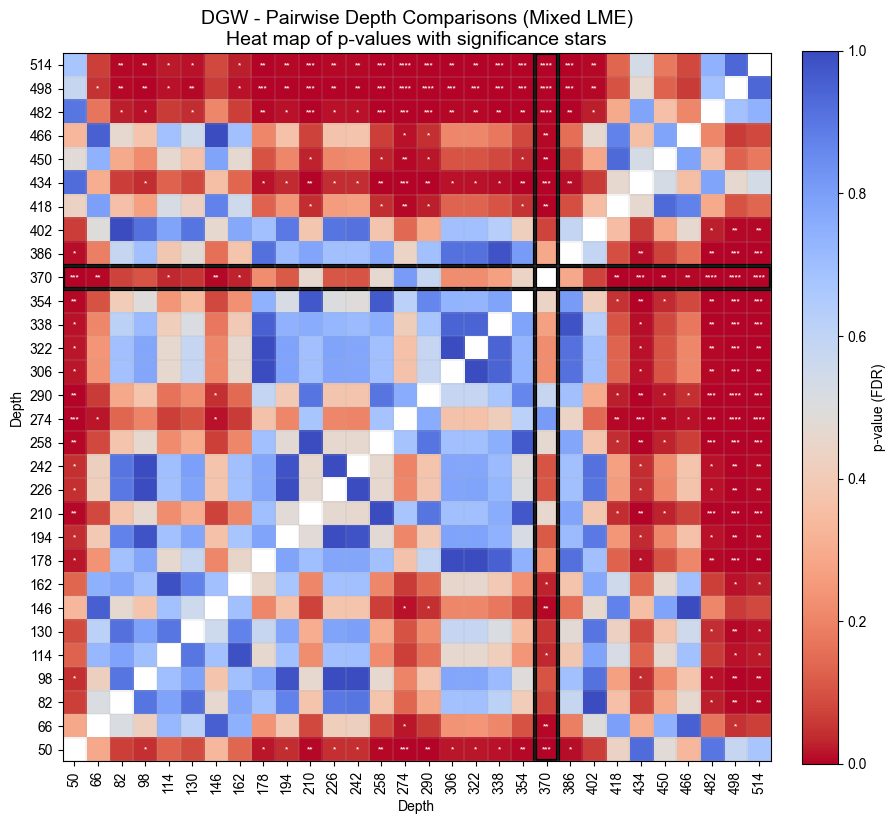

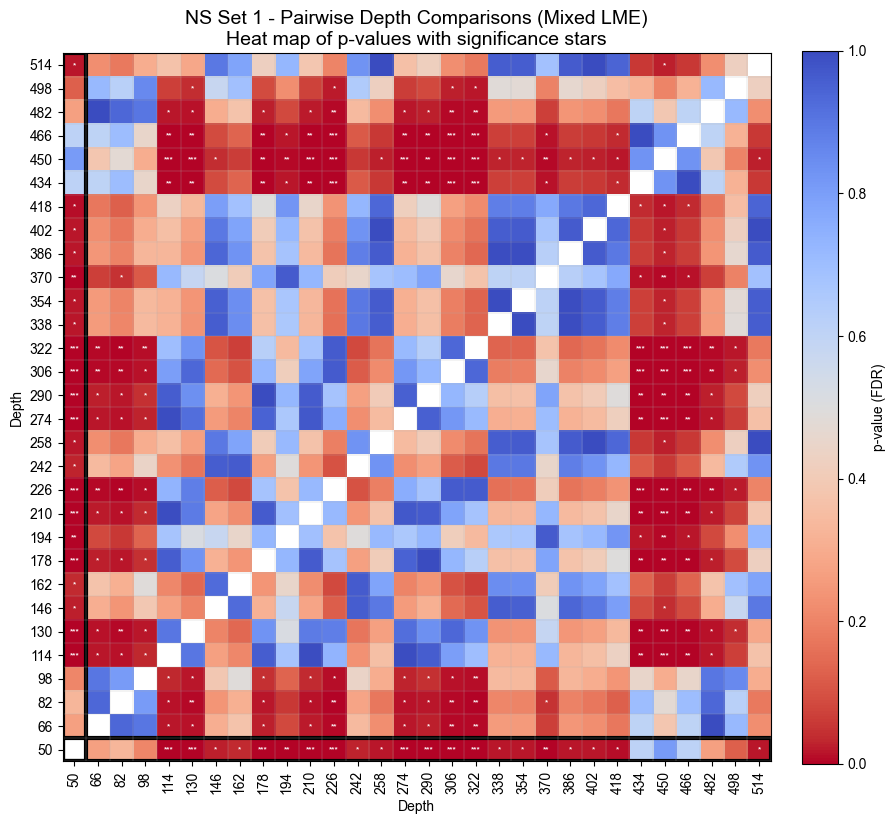

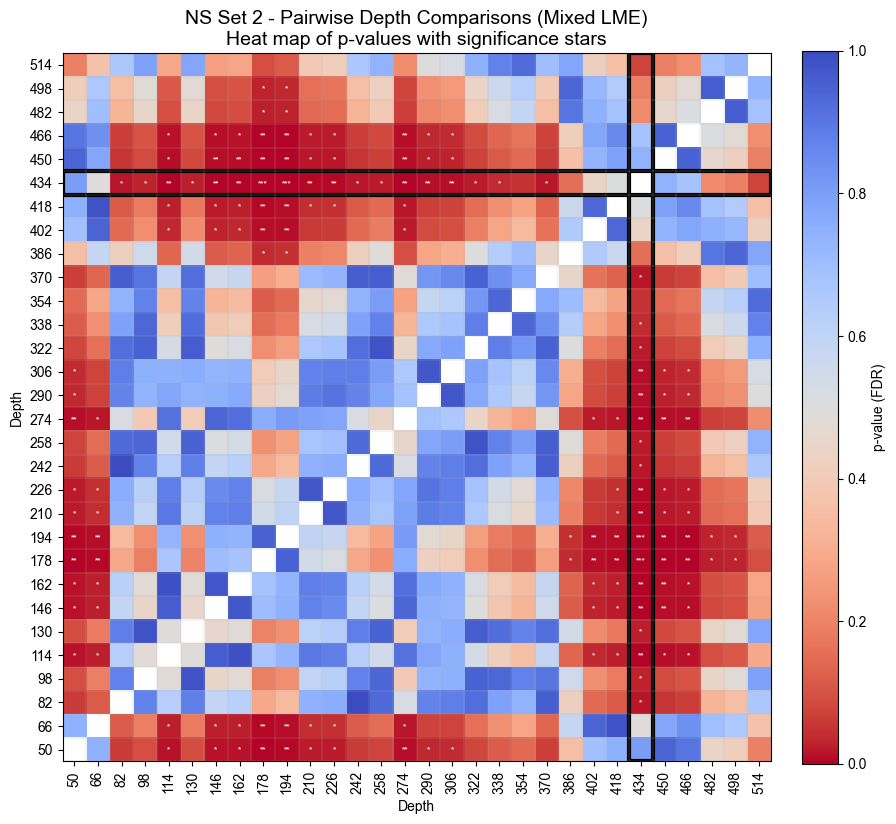

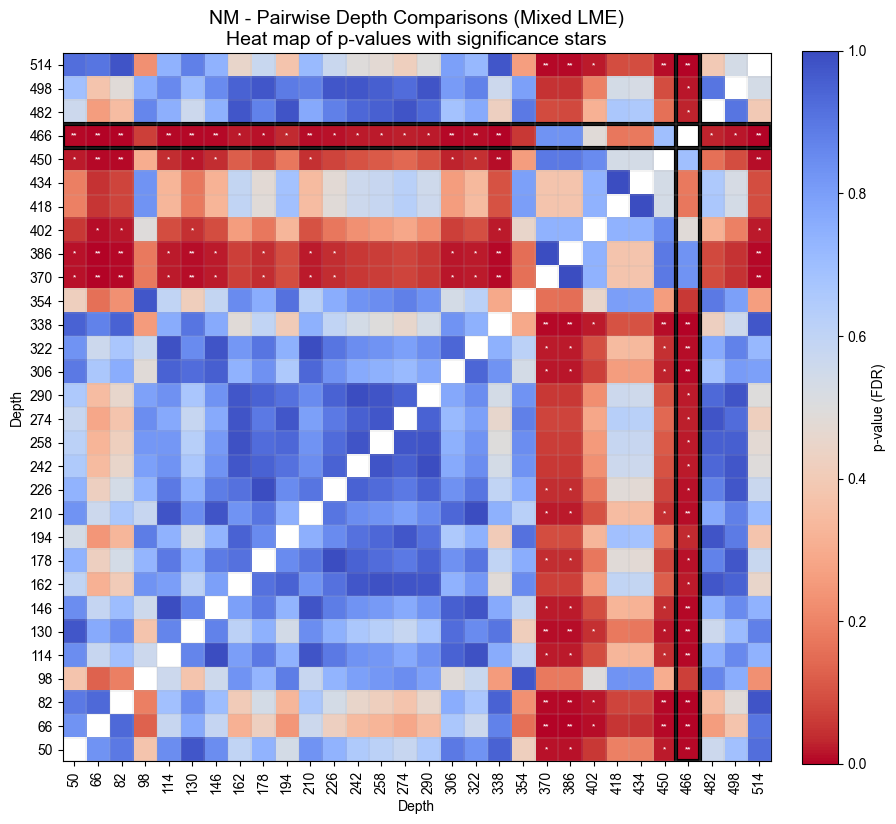

In [29]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests

features_resp = features_resp[(features_resp['depth'] < 515) & (features_resp['depth'] != 500)]  # remove 3p data

# Some parameters for the plot
z_values = features_resp['depth'].unique()
z_values = np.array(z_values)
z_values = np.sort(z_values)
stims = ['DGF', 'DGW', 'NI118', 'NI12', 'NM']
titles = ['DGF', 'DGW', 'NS Set 1', 'NS Set 2', 'NM']


# fig, axs = plt.subplots(1, len(stim_types), figsize=(25, 5))
for idx, stim_type in enumerate(stims):
    print(f"\n\n=== Analyzing stim type: {stim_type} ===")
    mean_feature_df = features_resp.groupby(by=['mouse_id', 'column', 'depth'])[stim_type].mean()
    mean_feature_df = mean_feature_df.reset_index()

    df = mean_feature_df.copy()
    df = df.sort_values(by='depth').reset_index()
    df['mouse_id'] = df['mouse_id'].astype("category")
    df['column'] = df['column'].astype("category")
    df['depth'] = df['depth'].astype("category")
    depth_levels = df.depth.unique()

    # 2) Fit the mixed model: accuracy ~ depth + (1|mouse) + (1|mouse:column)
    res = smf.mixedlm(
        f"{stim_type} ~ C(depth)",
        data=df,
        groups=df["mouse_id"],
        re_formula="~1",
        vc_formula={"column": "0 + C(column)"}
    ).fit(method="lbfgs")

    # Reduced model: no depth term (intercept only)
    res_reduced = smf.mixedlm(
        f"{stim_type} ~ 1",
        data=df,
        groups=df["mouse_id"],
        re_formula="~1",
        vc_formula={"column": "0 + C(column)"}
    ).fit(method="lbfgs")

    # Likelihood ratio test
    lr_stat = 2 * (res.llf - res_reduced.llf)
    df_diff = res.df_modelwc - res_reduced.df_modelwc
    p_value = stats.chi2.sf(lr_stat, df_diff)

    print(f"Depth effect (likelihood ratio test): χ²({int(df_diff)}) = {lr_stat:.2f}, p = {p_value:.4g}")

    # 3) Build “EMM” vectors (fixed-effects means per depth)
    fe_names = res.fe_params.index.tolist()
    beta = res.fe_params.values
    Sigma = res.cov_params().loc[fe_names, fe_names].values  # cov of fixed effects
    baseline = depth_levels[0]

    def v_for(level):
        v = np.zeros(len(fe_names))
        v[fe_names.index("Intercept")] = 1.0
        name = f"C(depth)[T.{level}]"
        if name in fe_names: v[fe_names.index(name)] = 1.0
        return v

    R = np.vstack([v_for(d) for d in depth_levels])  # rows are depths

    # 4) Pairwise contrasts for all depth pairs
    rows = []
    for i, j in itertools.combinations(range(len(depth_levels)), 2):
        L = R[i] - R[j]
        diff = float(L @ beta)
        se   = float(np.sqrt(L @ Sigma @ L))
        z    = diff / se if se > 0 else np.inf
        p    = 2 * (1 - norm.cdf(abs(z)))
        rows.append({
            "depth_a": depth_levels[i],
            "depth_b": depth_levels[j],
            "diff": diff,
            "se": se,
            "z": z,
            "p_raw": p
        })
    contrasts = pd.DataFrame(rows)

    # 5) Add FDR (BH)
    contrasts["p_fdr_bh"]    = multipletests(contrasts["p_raw"], method="fdr_bh")[1]

    # Done: 'contrasts' now has raw and FDR p-values for every pair
    contrasts.sort_values("p_fdr_bh", inplace=True)


    ########### Plotting ###########
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    show_upper_triangle_only = False             # set False to show entire matrix
    mark_diagonal = False                       # usually we leave diagonal unmarked

    ## Build the matrix of p-values
    depth_to_idx = {d:i for i,d in enumerate(depth_levels)}
    K = len(depth_levels)

    P = np.ones((K, K), dtype=float)  # initialize to 1s (diagonal = 1)
    for _, row in contrasts.iterrows():
        i = depth_to_idx[row["depth_a"]]
        j = depth_to_idx[row["depth_b"]]
        p = float(row["p_fdr_bh"])
        P[i, j] = p
        P[j, i] = p

    if not mark_diagonal:
        np.fill_diagonal(P, np.nan)  # keep diagonal neutral/blank

    # Optionally only plot upper triangle
    if show_upper_triangle_only:
        mask = np.tril(np.ones_like(P, dtype=bool), k=0)  # lower triangle + diag masked
        P_plot = P.copy()
        P_plot[mask] = np.nan
    else:
        P_plot = P

    im = ax.imshow(P_plot, origin="lower", interpolation="nearest", vmin=0, vmax=1, cmap="coolwarm_r", rasterized=True)

    # Colorbar labeled with plain p-values
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("p-value (FDR)")

    # Ticks & labels
    ax.set_xticks(np.arange(K))
    ax.set_yticks(np.arange(K))
    ax.set_xticklabels(depth_levels, rotation=90)
    ax.set_yticklabels(depth_levels)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Depth")
    ax.set_title(f"{titles[idx]} - Pairwise Depth Comparisons (Mixed LME)\nHeat map of p-values with significance stars", fontsize=14)

    # Overlay significance stars
    # Only annotate plotted (non-masked) cells
    for i in range(K):
        for j in range(K):
            p = P_plot[i, j]
            if np.isnan(p):
                continue
            stars = p_to_stars(p)
            if stars:
                ax.text(j, i, stars, ha="center", va="center", fontsize=6, fontweight="bold", color="white")

    # Add box around the depth with the highest average accuracy
    depth_means = df.groupby("depth")[stim_type].mean()
    best_depth = depth_means.idxmax()
    best_idx = list(depth_levels).index(best_depth)

    print(f"Best depth = {best_depth}, mean accuracy = {depth_means[best_depth]:.3f}")

    ax.add_patch(plt.Rectangle((-0.5, best_idx-0.5),
                            len(depth_levels), 1,
                            fill=False, edgecolor="black", linewidth=3))
    # Rectangle for the column
    ax.add_patch(plt.Rectangle((best_idx-0.5, -0.5),
                            1, len(depth_levels),
                            fill=False, edgecolor="black", linewidth=3))


    # Optional thin grid for readability
    ax.set_xticks(np.arange(-0.5, K, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, K, 1), minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.2)
    ax.tick_params(which="minor", length=0)

    plt.savefig(os.path.join(ARTIFACT_DIR, 'figures', f"SUPPFIG_sigtestsforfig4b_{titles[idx]}.png"), format="png", dpi=300)


## SUPPLEMENTARY FIGURE 9B

In [21]:
#### load in decoding results

mouse_colors = {'slc2': "#66CCEE", 'slc4': "#228833", 'slc5': '#CCBB44', 'teto1': '#EE6677'}
mouse_colors_2 = {409828: "#66CCEE", 416296: "#228833", 427836: '#CCBB44', 438833: '#EE6677'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = [409828, 416296, 427836, 438833]
mouse_mapping = {
    '409828': 'Mouse 1',
    '416296': 'Mouse 2',
    '427836': 'Mouse 3',
    '438833': 'Mouse 4'
}

stim_types = [
    "drifting_gratings_full", 
    "drifting_gratings_windowed", 
    "natural_images",
    "natural_images_12", 
    ]
decode_dims = {
    "drifting_gratings_full": "direction",
    "drifting_gratings_windowed": "direction",
    "natural_images": "image_index",
    "natural_images_12": "image_index",
               }

multi_stim_pairs = {
        "drifting_gratings_full": "drifting_gratings_windowed",
        "drifting_gratings_windowed": "drifting_gratings_full",
        "natural_images": "natural_images_12",
        "natural_images_12": "natural_images",
    }

def depth_vol_mapping(vol_id, plane_id):
    plane_list = [int(p) for p in list(str(plane_id))]
    plane_index = int(np.mean(plane_list) - 1) # plane index is 0-based, so subtract 1
    depth_values = {
                1: [50, 66, 82, 98, 114, 130],
                2: [146, 162, 178, 194, 210, 226],
                3: [242, 258, 274, 290, 306, 322],
                4: [338, 354, 370, 386, 402, 418],
                5: [434, 450, 466, 482, 498, 514],
                6: [500],
                7: [525],
                8: [550],
                9: [575],
                'a': [600],
                'b': [625],
                'c': [650],
                'd': [675],
                'e': [700],
                'f': [725]
            }
    return depth_values[vol_id][plane_index]

tag = "2025-08-08_3"
bootstrap_size = 1
repetitions = 1
num_planes = 1
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    decode_dim = decode_dims[stim_type]
    other_stim_type = multi_stim_pairs[stim_type]

    path_name = f'/home/naomi/Desktop/data/decoding_results/{tag}_TRAIN{stim_type}_TEST{other_stim_type}_Boot{bootstrap_size}_Rep{repetitions}_NumPlanes{num_planes}'
    results_df = pd.DataFrame()
    for filename in os.listdir(path_name):
        f = os.path.join(path_name, filename)
        results_df = pd.concat([results_df, pd.read_pickle(f)])
    
    results_df['stim_type_training'] = stim_type
    results_df['stim_type_testing'] = other_stim_type
    results_df['decode_dim'] = decode_dim

    all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_vol_mapping(vol_id = x['volume_id'], plane_id = x['plane_id']), axis=1)

Regression between frac_resp_dgf and drifting_gratings_full decoding accuracy:
  Beta: 0.0383
  R-squared: 0.0004
  t-value: 0.4551
  p-value: 0.6492
Regression between frac_resp_dgw and drifting_gratings_windowed decoding accuracy:
  Beta: 0.4346
  R-squared: 0.0752
  t-value: 6.2166
  p-value: 1.113e-09
Regression between frac_res_to_ns118 and natural_images decoding accuracy:
  Beta: 0.0317
  R-squared: 0.0003
  t-value: 0.4010
  p-value: 0.6886
Regression between frac_res_to_ns12 and natural_images_12 decoding accuracy:
  Beta: -0.0205
  R-squared: 0.0010
  t-value: -0.6959
  p-value: 0.4868


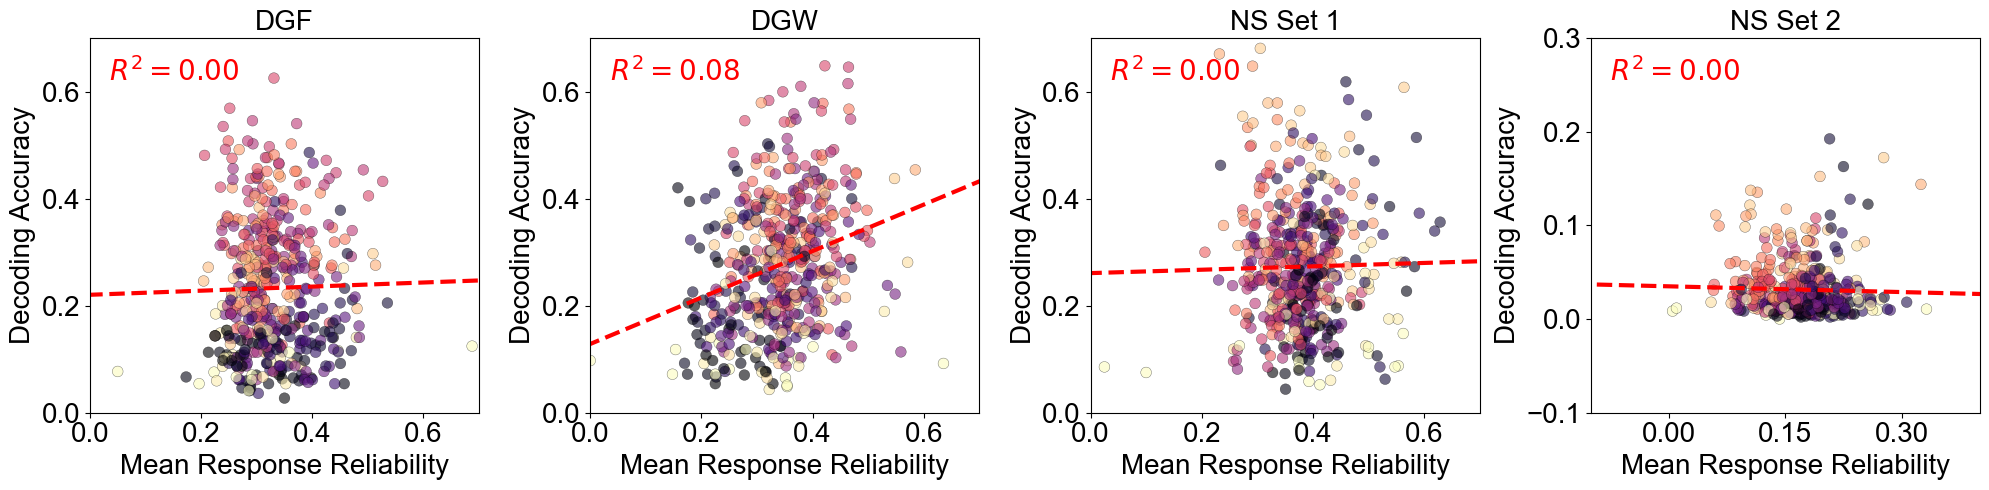

In [28]:
metrics = ['frac_resp_dgf',
        'frac_resp_dgw',
        'frac_res_to_ns118', # please note the other fraction frac_resp_ns118 is from Chase h5 which is incorrect
        'frac_res_to_ns12', # please note the other fraction frac_resp_ns12 is from Chase h5 which is incorrect
        ]
stim_types = {
    'frac_resp_dgf':'drifting_gratings_full',
    'frac_resp_dgw':'drifting_gratings_windowed',
    'frac_res_to_ns118':'natural_images',
    'frac_res_to_ns12':'natural_images_12',
}

titles = ['DGF', 'DGW', 'NS Set 1', 'NS Set 2']
mouse_mapping = {
    409828: 'slc2',
    416296: 'slc4',
    427836: 'slc5',
    438833: 'teto1'
}


fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5))
for idx, metric in enumerate(metrics):
    ax = axs[idx]
    metric_df = cell_info.groupby(by=['mouse_id', 'column', 'volume', 'z'])[metric].mean().reset_index()
    
    temp_df = all_results_df[(all_results_df['stim_type_testing'] == stim_types[metric]) &
                             (all_results_df['depth'] != 500) &
                             (all_results_df['depth'] < 515)].explode('val_accuracy')
    depth_values = temp_df['depth'].unique()
    decoding_df = temp_df.groupby(by=['mouse_id', 'column_id', 'volume_id', 'depth'])['val_accuracy'].mean().reset_index()
    decoding_df = decoding_df.rename(columns={'column_id': 'column', 'volume_id': 'volume', 'depth': 'z'})

    decoding_df['column'] = decoding_df['column'].astype(str)
    decoding_df['volume'] = decoding_df['volume'].astype(str)
    decoding_df['column'] = decoding_df['column'].astype('object')
    decoding_df['mouse_id'] = [mouse_mapping[x] for x in decoding_df['mouse_id']]
    decoding_df['mouse_id'] = decoding_df['mouse_id'].astype('object')

    merge_df = decoding_df.merge(metric_df, on=['mouse_id', 'column', 'volume', 'z'], how='inner', suffixes=('_decoding', '_metric'))

    sns.scatterplot(
        data=merge_df,
        x=metric,
        y='val_accuracy',
        hue='z',
        palette='magma_r',
        s=60,
        alpha=0.6,
        ax=ax, 
        edgecolor='black',
        linewidth=0.3, 
        legend=False,
    )

    smap = plt.cm.ScalarMappable(cmap='magma_r', norm=plt.Normalize(vmin=depth_values.min(), vmax=depth_values.max()))
    smap.set_array([])

    ax.set_xlim(0, 0.7) if idx != 3 else ax.set_xlim(-0.1, 0.4)
    ax.set_ylim(0, 0.7) if idx != 3 else ax.set_ylim(-0.1, 0.3)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    # Fit a linear regression model
    x_data = merge_df[metric].values
    y_data = merge_df['val_accuracy'].values
    x_data = np.array(x_data, dtype=float).reshape(-1, 1)
    y_data = np.array(y_data, dtype=float)
    x_data = sm.add_constant(x_data)  # Adds a constant term to the predictor
    model = sm.OLS(y_data, x_data).fit()
    
    # Plot the regression line
    x_fit = np.linspace(-1, 1, 100)
    x_fit = sm.add_constant(x_fit)  # Adds a constant term to the predictor
    y_fit = model.predict(x_fit)
    ax.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=3, label='Linear Regression')

    # Pull out model results and print
    beta = model.params[1]
    r_squared = model.rsquared
    p_value = model.pvalues[1]
    t_value = model.tvalues[1]

    print(f"Regression between {metric} and {stim_types[metric]} decoding accuracy:")
    print(f"  Beta: {beta:.4f}")
    print(f"  R-squared: {r_squared:.4f}")
    print(f"  t-value: {t_value:.4f}")
    print(f"  p-value: {p_value:.4g}")

    # Add text annotation for R^2 value
    ax.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', 
            transform=ax.transAxes, fontsize=20, verticalalignment='top', color='red')

    ax.set_title(titles[idx], fontsize=20)
    ax.set_xlabel(f'Mean Response Reliability', fontsize=20)
    ax.set_ylabel(f'Decoding Accuracy', fontsize=20)
    ax.tick_params(axis="both", which="major", labelsize=20)

plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "figures", "SUPPFIG4B_decoding_vs_reliabilities.png"), format='png', dpi=300)